In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read relative file: https://www.kaggle.com/rtatman/reproducibility-tips-absolute-vs-relative-paths
#df = pd.read_csv('C:/Users/maria/Documents/UFAL/Ciencia de dados/Projeto/data/APOSENTADOS_112020_FULL.csv',low_memory=False, error_bad_lines=False, sep=';')
df = pd.read_csv(r'../datasets/APOSENTADOS_112020_FULL.csv', sep=';', low_memory=False)
df.describe()
print("\n")
df.head()

,Nome,CPF,Matricula,Orgao,Sigla Orgao,Orgao vinculacao,Cargo emprego,Classe,Padrao,Referencia,Nivel,Tipo aposentadoria,Fund legal aposentadoria,Portaria aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,ANTONIO ALVES BEZERRA ...,***686441**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE VIGILANCIA,S,II,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,ANTONIO CARLOS CONCEICAO MARTINS ...,***423941**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,ESTATISTICO,S,III,0,0,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,ARLINDA COSTA GUTEMBERG ...,***063691**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE ENFERMAGEM,S,III,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,1071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,BENTO MOREIRA LIMA JUNIOR ...,***460301**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,2071990,ADMISSAO SEM CONCURSO PUBLICO ...,8061961,"19.478,03",NaN,NaN
4,BERENICE MOREIRA SANTOS ...,***021701**,"1,3E+11","MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,VOLUNTARIA (ART. 186 ITEM III ALINEA A),PORTARIA NO. 253 PUBLICADO EM 31MAI1990 ...,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [3]:
#Tratamento dos dados
#Drop colunas que não vão ser usadas
aposentados = df.drop(['Nome', 'CPF', 'Matricula', 'Sigla Orgao', 'Orgao vinculacao', 'Padrao',
        'Referencia', 'Nivel', 'Fund legal aposentadoria', 'Portaria aposentadoria'], axis=1)

# Tirando datas vazias
aposentados.drop(aposentados[aposentados['Dt ocorrencia inatividade'] == '        '].index, inplace = True)
aposentados.drop(aposentados[aposentados['Dt ingresso servico publico'] == '        '].index, inplace = True)

aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,1071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,2071990,ADMISSAO SEM CONCURSO PUBLICO ...,8061961,"19.478,03",NaN,NaN
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [4]:
# Inserindo 0 nas datas com 7 dígitos
aposentados['Dt ocorrencia inatividade'] = aposentados['Dt ocorrencia inatividade'].str.zfill(8)
aposentados['Dt ingresso servico publico'] = aposentados['Dt ingresso servico publico'].str.zfill(8)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.478,03",NaN,NaN
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [5]:
# Verificando quantas linhas das colunas de datas tem Nan
print(aposentados['Dt ocorrencia inatividade'].isnull().sum())
#print("\n")
print(aposentados['Dt ingresso servico publico'].isnull().sum())

1
0


In [6]:
aposentados = aposentados[aposentados['Dt ocorrencia inatividade'].notna()]

aposentados = aposentados[aposentados['Dt ingresso servico publico'].notna()]

In [7]:
# Verificando quantas linhas das colunas de datas tem Nan
print(aposentados['Dt ocorrencia inatividade'].isnull().sum())
#print("\n")
print(aposentados['Dt ingresso servico publico'].isnull().sum())
aposentados.head(5)

0
0


,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",NaN,NaN
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04",NaN,NaN
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",NaN,NaN
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.478,03",NaN,NaN
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92",NaN,NaN


In [8]:
# Remover string de data com len maior que 8
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
aposentados = aposentados[aposentados['Dt ocorrencia inatividade'].map(len) <= 8]

aposentados = aposentados[aposentados['Dt ingresso servico publico'].map(len) <= 8]

# Analisar colunas de datas
print(aposentados['Dt ocorrencia inatividade'])

0         30121994
1         31011995
2         01071990
3         02071990
4         31051990
            ...   
421558    18092015
421559    11121998
421560    21102015
421561    17012008
421562    10081976
Name: Dt ocorrencia inatividade, Length: 413043, dtype: object


In [9]:
# Ordenando os valores para remover datas fora do padrão
aposentados = aposentados.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
172987,UNIVERSIDADE FEDERAL DO PARANA,GARCON,B,APOSENTADORIA POR INVALIDEZ,00000005,2006.,04052006,ADMISSAO POR CONCURSO PUBLICO ...,22111991,"1.064,86"
46588,MINISTERIO DA SAUDE,AGENTE DE PORTARIA,C,VOLUNTARIA,01011955,NOMEACAO PARA CARGO ...,01011950,"2.524,54",NaN,NaN
68876,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,"3.189,65",NaN,NaN
68418,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,"1.217,16",NaN,NaN
319305,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,MECANICO DE MOTOR A COMBUSTAO,S,VOLUNTARIA,01011967,ADMISSAO POR CONCURSO PUBLICO ...,30101954,"3.378,10",NaN,NaN


In [10]:
# Removendo valor discrepante
aposentados.drop(172987, inplace=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
46588,MINISTERIO DA SAUDE,AGENTE DE PORTARIA,C,VOLUNTARIA,01011955,NOMEACAO PARA CARGO ...,01011950,"2.524,54",NaN,NaN
68876,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,"3.189,65",NaN,NaN
68418,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,"1.217,16",NaN,NaN
319305,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,MECANICO DE MOTOR A COMBUSTAO,S,VOLUNTARIA,01011967,ADMISSAO POR CONCURSO PUBLICO ...,30101954,"3.378,10",NaN,NaN
370220,FUND. INST. BRASIL. GEOG. E ESTATISTICA,TEC PLAN GEST INF INFOR GEOG ESTATIS,S,APOSENTADORIA POR INVALIDEZ,01011968,ADMISSAO SEM CONCURSO PUBLICO ...,01061946,"4.915,86",NaN,NaN


In [11]:
# Ordenando os valores
aposentados = aposentados.sort_values(by=['Dt ingresso servico publico'], ascending=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
325295,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,06111967,ADMISSAO POR CONCURSO PUBLICO ...,01011932,"4.039,27",NaN,NaN
317792,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AGENTE SERVICOS ENGENHARIA,S,VOLUNTARIA,02011993,ADMISSAO POR CONCURSO PUBLICO ...,01011936,"4.337,91",NaN,NaN
23249,MINISTERIO DA ECONOMIA,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,S,VOLUNTARIA,26061979,ADMISSAO POR CONCURSO PUBLICO ...,01011937,"24.508,93",NaN,NaN
318025,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,01011993,ADMISSAO POR CONCURSO PUBLICO ...,01011938,"3.603,33",NaN,NaN
318881,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,ARTIFICE DE MECANICA,S,VOLUNTARIA,07031980,ADMISSAO POR CONCURSO PUBLICO ...,01011938,"4.920,03",NaN,NaN


In [12]:
# Transformar data Dt ocorrencia inatividade; Dt ingresso servico publico; em tipo date %d%m%Y
aposentados['Dt ocorrencia inatividade'] = pd.to_datetime(aposentados['Dt ocorrencia inatividade'], format='%d%m%Y')
aposentados['Dt ingresso servico publico'] = pd.to_datetime(aposentados['Dt ingresso servico publico'],format='%d%m%Y')
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria,Unnamed: 18,Unnamed: 19
325295,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,1967-11-06,ADMISSAO POR CONCURSO PUBLICO ...,1932-01-01,"4.039,27",NaN,NaN
317792,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AGENTE SERVICOS ENGENHARIA,S,VOLUNTARIA,1993-01-02,ADMISSAO POR CONCURSO PUBLICO ...,1936-01-01,"4.337,91",NaN,NaN
23249,MINISTERIO DA ECONOMIA,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,S,VOLUNTARIA,1979-06-26,ADMISSAO POR CONCURSO PUBLICO ...,1937-01-01,"24.508,93",NaN,NaN
318025,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,1993-01-01,ADMISSAO POR CONCURSO PUBLICO ...,1938-01-01,"3.603,33",NaN,NaN
318881,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,ARTIFICE DE MECANICA,S,VOLUNTARIA,1980-03-07,ADMISSAO POR CONCURSO PUBLICO ...,1938-01-01,"4.920,03",NaN,NaN


In [13]:
#Coletando informações necessárias para os plots

# Tipos de aposentadorias apresentadas
tipo_aposentadoria = aposentados['Tipo aposentadoria'].value_counts()

# Selecionando apenas os registros de aposentadoria por invalidez
tipo_invalidez = aposentados.loc[aposentados['Tipo aposentadoria'] == 'APOSENTADORIA POR INVALIDEZ']

# Selecionando os cargos que tem registro de aposentadoria por invalidez e
# que pertence ao orgão ministério da saúde
tipo_invalidez_orgao_cargos = aposentados.loc[aposentados['Orgao'] == 'MINISTERIO DA SAUDE                     ']

#Selecionando os tipos de cargos que tem no Ministerio da Saude que se aposentaram por invalidez
tipo_cargos_invalidez = tipo_invalidez_orgao_cargos['Cargo emprego'].value_counts()

#Selecionando os Orgaos que tem aposentadoria por invalidez e contando sua ocorrencia
tipo_invalidez_orgao = tipo_invalidez['Orgao'].value_counts()

<ipython-input-14-0b91265400d2>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../imagens/tipos_aposentadoria.png', dpi=450, bbox_inches='tight');


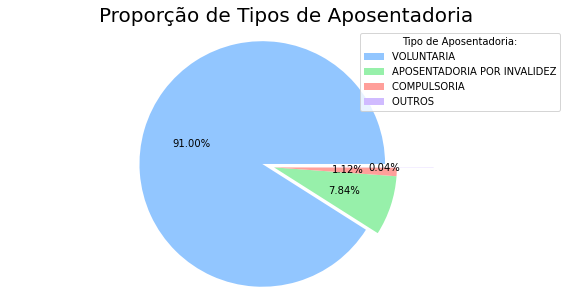

In [14]:
#Seleciona os valores dos salários
# Criando os gráficos
# Proporção de Tipos de Aposentadorias
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
plt.title('Proporção de Tipos de Aposentadoria', size=20)
explode = (0.1, 0, 0, 0.3)
plt.pie(tipo_aposentadoria.values,explode=explode, autopct='%1.2f%%')
plt.legend(labels = tipo_aposentadoria.index, title = "Tipo de Aposentadoria:")
plt.axis('equal')
plt.savefig('../imagens/tipos_aposentadoria.png', dpi=450, bbox_inches='tight');
plt.show()

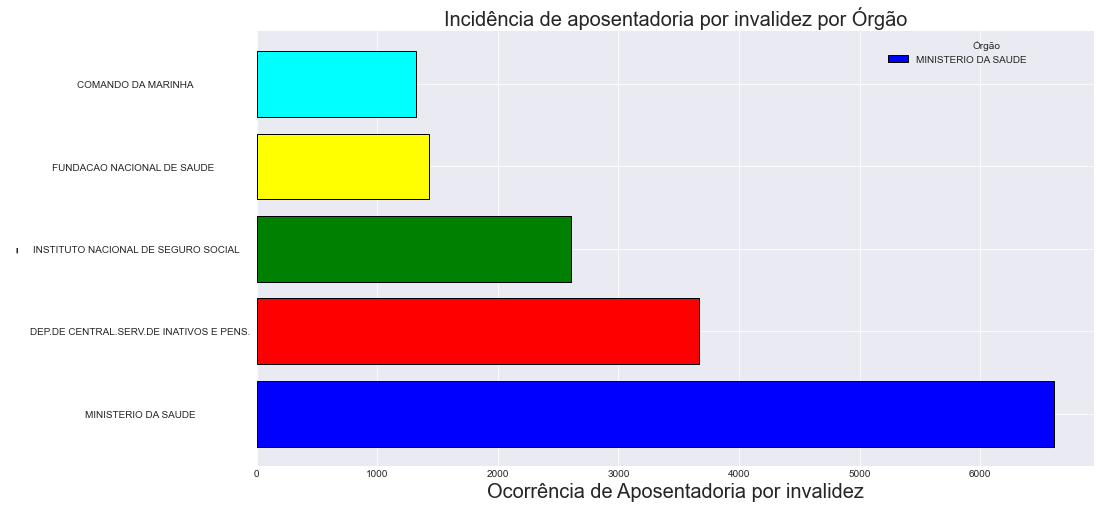

In [17]:
# Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
list_color = ['blue', 'red', 'green', 'yellow', 'cyan']
plt.barh(tipo_invalidez_orgao.index[:5],tipo_invalidez_orgao.values[:5], color=list_color, edgecolor='black')
#plt.title('Proporção de Orgãos com maior incidência de aposentadoria por invalidez', size=20)
plt.title('Incidência de aposentadoria por invalidez por Órgão', size=20)
#plt.legend(title = "Tipo de Aposentadoria:", labels = tipo_invalidez_orgao.index[:5])
plt.legend(title = "Órgão", labels = tipo_invalidez_orgao.index[:])
plt.xlabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.ylabel('-', size=20)
plt.savefig('../imagens/aposentadoria_invalidez.png', dpi=450, bbox_inches='tight');
plt.show()

In [ ]:
# Grafico que apresenta os cargos e a quantidade de pessoas aposentadas por invalidez que trabalham no Ministerio da Saude
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
list_color = ['blue', 'red', 'green', 'yellow', 'cyan']
plt.barh(tipo_cargos_invalidez.index[:5], tipo_cargos_invalidez.values[:5], color=list_color, edgecolor='black')
#plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.title('Ministério da Saúde: Incidência de aposentadoria por invalidez por cargo', size=20)
#plt.legend(title = "Tipo de Aposentadoria:", labels = tipo_cargos_invalidez.index[:5])
plt.legend(title = "Cargo", labels = tipo_cargos_invalidez.index[:5])
#plt.legend(title = "Cargo", labels = labels_cargo)
plt.xlabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.ylabel('Cargo', size=20)
plt.savefig('../imagens/maior_incidencia_invalidez.png', dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
print(aposentados.columns)